In [ ]:
import kagglehub
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [ ]:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split

data = pd.read_csv(path + "/diabetes.csv")
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


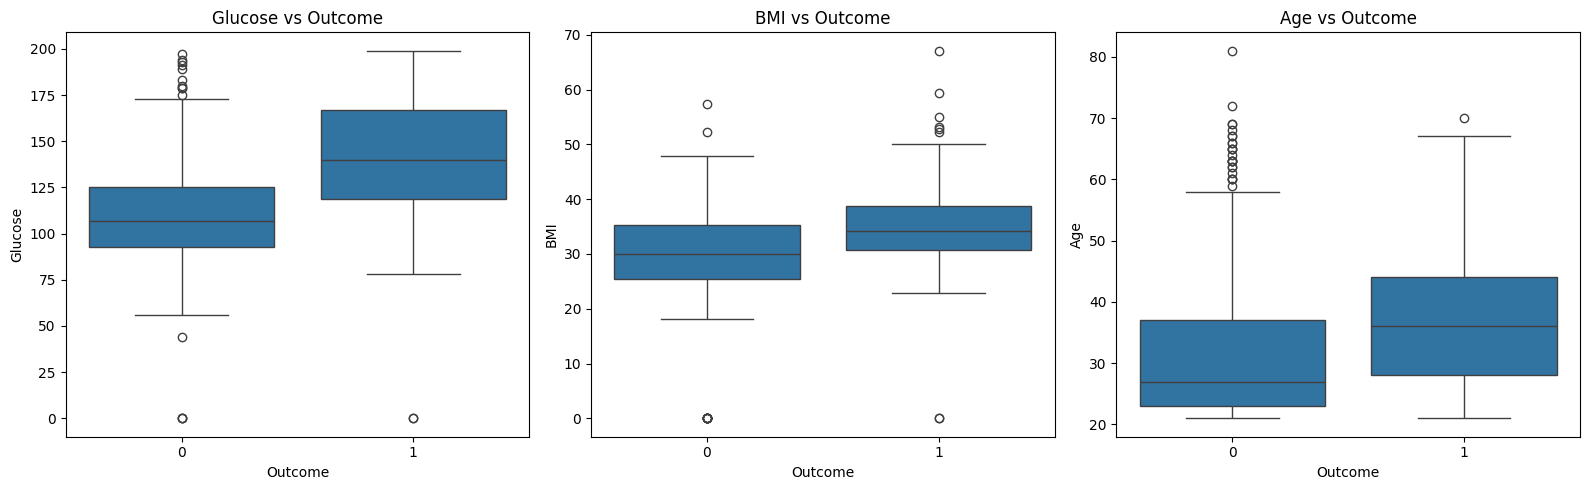

Saved the plot to /content/drive/MyDrive/output/eda/boxplots.png


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

save_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Glucose vs Outcome')

# BMI - Outcome
plt.subplot(1, 3, 2)
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.title('BMI vs Outcome')

# Age - Outcome
plt.subplot(1, 3, 3)
sns.boxplot(x='Outcome', y='Age', data=data)
plt.title('Age vs Outcome')

plt.tight_layout()

output_file = os.path.join(save_path, 'boxplots.png')
plt.savefig(output_file)

plt.show()

print(f"Saved the plot to {output_file}")


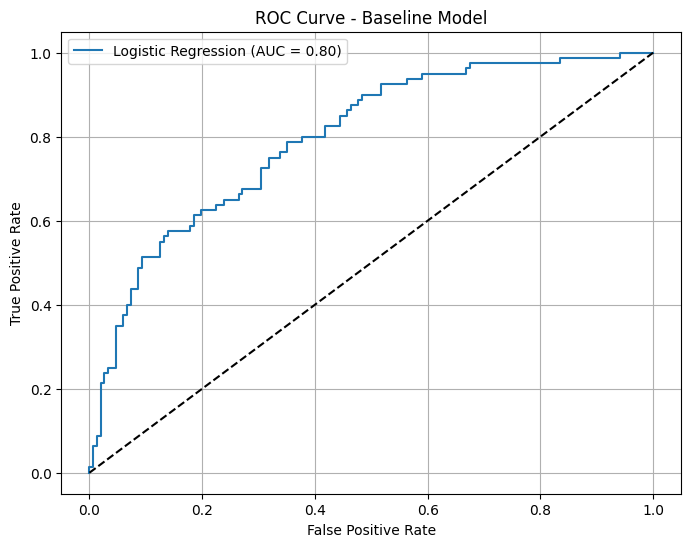

Saved the ROC curve to /content/drive/MyDrive/output/eda/roc_curve.png


In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc


save_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

# ROC Curve Code
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline Model')
plt.legend()
plt.grid()

output_file = os.path.join(save_path, 'roc_curve.png')
plt.savefig(output_file)

plt.show()

print(f"Saved the ROC curve to {output_file}")


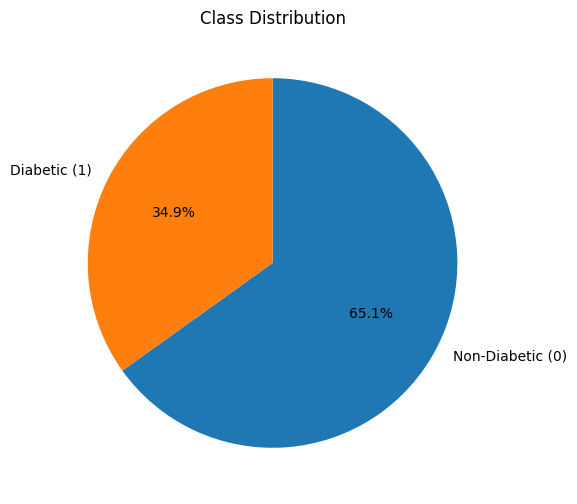

Saved the Class Distribution pie chart to /content/drive/MyDrive/output/eda/class_distribution.png


In [ ]:
import os
import matplotlib.pyplot as plt

save_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

# Class Distribution Code
class_counts = data['Outcome'].value_counts()
labels = ['Non-Diabetic (0)', 'Diabetic (1)']
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Class Distribution')

output_file = os.path.join(save_path, 'class_distribution.png')
plt.savefig(output_file)

plt.show()

print(f"Saved the Class Distribution pie chart to {output_file}")


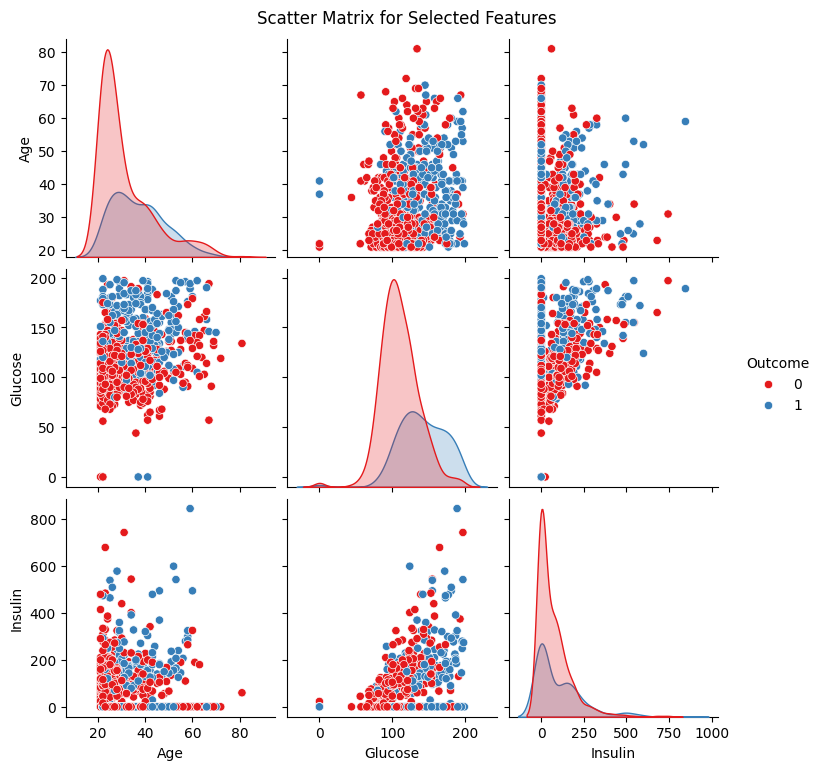

Saved the pairplot to /content/drive/MyDrive/output/eda/pairplot_selected_features.png


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

save_path = '/content/drive/MyDrive/output/eda'
os.makedirs(save_path, exist_ok=True)

# Pairplots Code
selected_features = ['Age', 'Glucose', 'Insulin', 'Outcome']
pairplot = sns.pairplot(data[selected_features], hue='Outcome', diag_kind='kde', palette='Set1')
pairplot.fig.suptitle('Scatter Matrix for Selected Features', y=1.02)


output_file = os.path.join(save_path, 'pairplot_selected_features.png')
pairplot.savefig(output_file)

plt.show()

print(f"Saved the pairplot to {output_file}")
